<a href="https://colab.research.google.com/github/abinaya-345/AI-driven-movie-recommendation-system/blob/main/Flipkart_reviews_sentiment_analysis_using_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
#Import Required Libraries
import pandas as pd
import numpy as np
import re
import string
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from wordcloud import WordCloud, STOPWORDS


In [44]:
#Download NLTK Resources (Run once)
nltk.download('stopwords')
nltk.download('vader_lexicon')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [45]:
#Load Dataset
!wget "https://zenodo.org/records/17612521/files/data.zip?download=1" -O flipkart_reviews.zip


--2026-02-01 13:36:56--  https://zenodo.org/records/17612521/files/data.zip?download=1
Resolving zenodo.org (zenodo.org)... 137.138.52.235, 188.185.43.153, 188.185.48.75, ...
Connecting to zenodo.org (zenodo.org)|137.138.52.235|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4074542 (3.9M) [application/octet-stream]
Saving to: ‘flipkart_reviews.zip’

flipkart_reviews.zi 100%[===================>]   3.89M  1.10MB/s    in 4.3s    

2026-02-01 13:37:01 (917 KB/s) - ‘flipkart_reviews.zip’ saved [4074542/4074542]



In [49]:
#Load Dataset
!unzip flipkart_reviews.zip


Archive:  flipkart_reviews.zip
replace flipkart_product.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [50]:
#Load Dataset
import pandas as pd

data = pd.read_csv("flipkart_reviews.csv", encoding='latin1')
data.head()

,ProductName,Price,Rate,Review,Summary
0,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",5,Super!,Great cooler.. excellent air flow and for this...
1,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",5,Awesome,Best budget 2 fit cooler. Nice cooling
2,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",3,Fair,The quality is good but the power of air is de...
3,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",1,Useless product,Very bad product it's a only a fan
4,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",3,Fair,Ok ok product


In [51]:
#Check Missing Values
print(data.isnull().sum())


ProductName     0
Price           1
Rate            1
Review          4
Summary        14
dtype: int64


In [52]:
#Clean the Review Text
stemmer = SnowballStemmer("english")
stop_words = set(stopwords.words("english"))

def clean(text):
    text = str(text).lower()
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'<.*?>+', '', text)
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub(r'\n', '', text)
    text = re.sub(r'\w*\d\w*', '', text)

    words = [word for word in text.split() if word not in stop_words]
    words = [stemmer.stem(word) for word in words]

    return " ".join(words)

data["Review"] = data["Review"].apply(clean)


In [54]:
#Rating Distribution (Pie Chart)
ratings = data["Rate"].value_counts()

fig = px.pie(
    values=ratings.values,
    names=ratings.index,
    hole=0.5,
    title="Rating Distribution on Flipkart"
)
fig.show()

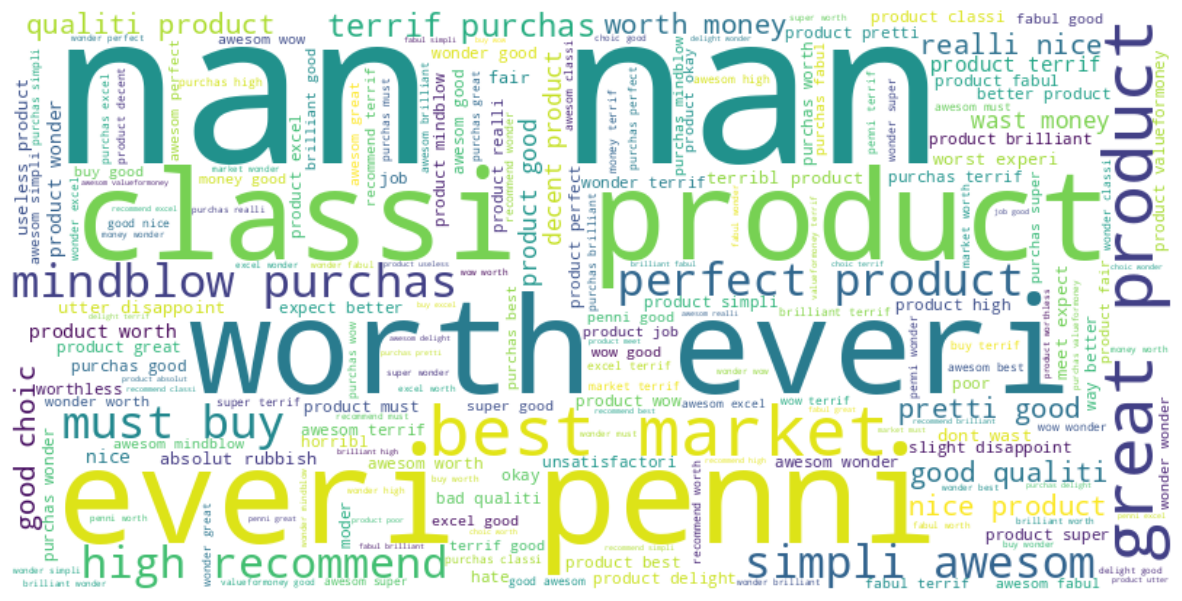

In [55]:
#Word Cloud of Reviews
text = " ".join(review for review in data.Review)

wordcloud = WordCloud(
    stopwords=STOPWORDS,
    background_color="white",
    width=800,
    height=400
).generate(text)

plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [56]:
#Sentiment Analysis using VADER
sentiments = SentimentIntensityAnalyzer()

data["Positive"] = data["Review"].apply(lambda x: sentiments.polarity_scores(x)["pos"])
data["Negative"] = data["Review"].apply(lambda x: sentiments.polarity_scores(x)["neg"])
data["Neutral"]  = data["Review"].apply(lambda x: sentiments.polarity_scores(x)["neu"])

data = data[["Review", "Positive", "Negative", "Neutral"]]
print(data.head())


            Review  Positive  Negative  Neutral
0            super       1.0     0.000    0.000
1           awesom       0.0     0.000    1.000
2             fair       1.0     0.000    0.000
3  useless product       0.0     0.737    0.263
4             fair       1.0     0.000    0.000


In [57]:
#Overall Sentiment Calculation
positive_score = data["Positive"].sum()
negative_score = data["Negative"].sum()
neutral_score  = data["Neutral"].sum()

def sentiment_result(p, n, neu):
    if p > n and p > neu:
        return "Overall Sentiment: Positive 😊"
    elif n > p and n > neu:
        return "Overall Sentiment: Negative 😠"
    else:
        return "Overall Sentiment: Neutral 🙂"

print(sentiment_result(positive_score, negative_score, neutral_score))


Overall Sentiment: Neutral 🙂


In [58]:
#Final Scores
print("Positive Score:", positive_score)
print("Negative Score:", negative_score)
print("Neutral Score :", neutral_score)


Positive Score: 75302.68299999998
Negative Score: 7500.8460000000005
Neutral Score : 107065.47399999999
